# Dataset analysis
### AKA why does any classifier believe every value is 0?


In [ ]:
import pandas as pd
import plotly.graph_objs as go


from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Appunti/TXA/TXA - the Sloop 🏴‍☠️/FINAL/Notebooks/crossed_dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


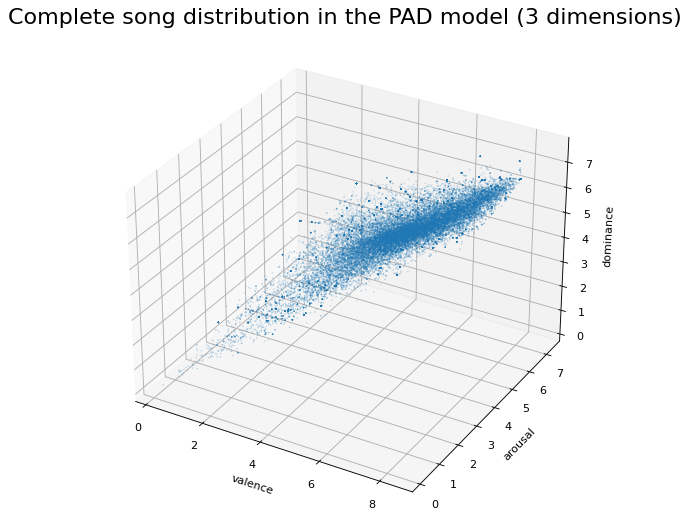

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches


# Create a 3D scatter plot
fig = plt.figure(constrained_layout=False, figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['valence_tags'], df['arousal_tags'], df['dominance_tags'], s=0.05)

# Set the labels for the axes
ax.set_xlabel('valence', fontsize=10)
ax.set_ylabel('arousal', fontsize=10)
ax.set_zlabel('dominance', fontsize=10)


# Set the title for the plot
ax.set_title('Complete song distribution in the PAD model (3 dimensions)', fontsize=20)


# Show the plot
plt.show()


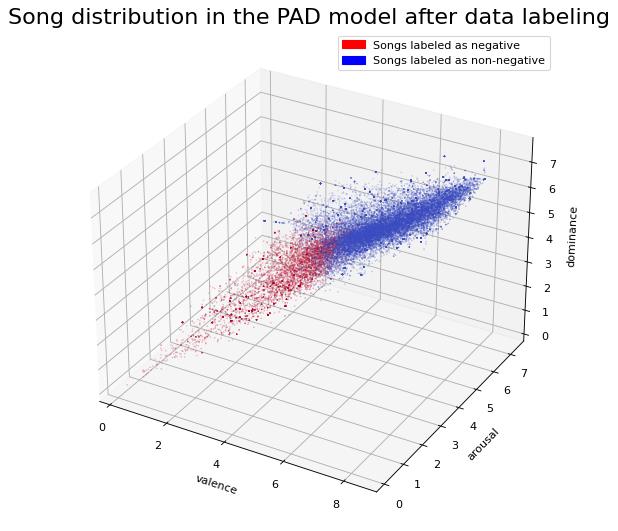

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['valence_tags'], df['arousal_tags'], df['dominance_tags'],
           c=df['sentiment'], cmap='coolwarm', s=0.05)

# Set the labels for the axes
ax.set_xlabel('valence')
ax.set_ylabel('arousal')
ax.set_zlabel('dominance')

# Set the title for the plot
ax.set_title('Song distribution in the PAD model after data labeling')

# Create custom patches
red_patch = mpatches.Patch(color='red', label='Songs labeled as negative')
blue_patch = mpatches.Patch(color='blue', label='Songs labeled as non-negative')

# Add legend to the plot with custom patches
ax.legend(handles=[red_patch, blue_patch])

# Show the plot
plt.show()

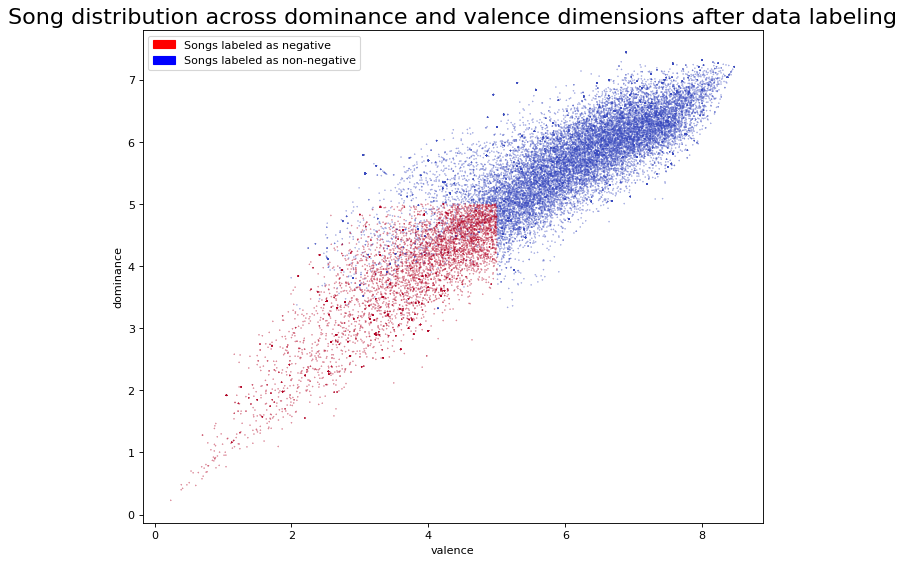

In [ ]:
# Create a 2D scatter plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
ax.scatter(df['valence_tags'], df['dominance_tags'], c=df['sentiment'], cmap='coolwarm',
           s=0.05)

# Set the labels for the axes
ax.set_xlabel('valence')
ax.set_ylabel('dominance')

# Set the title for the plot
ax.set_title('Song distribution across dominance and valence dimensions after data labeling')

# Create custom patches
red_patch = mpatches.Patch(color='red', label='Songs labeled as negative')
blue_patch = mpatches.Patch(color='blue', label='Songs labeled as non-negative')

# Add legend to the plot with custom patches
ax.legend(handles=[red_patch, blue_patch])

# Show the plot
plt.show()

From these graphs we understand there's an important overlap in the classes. This might confuse the models.

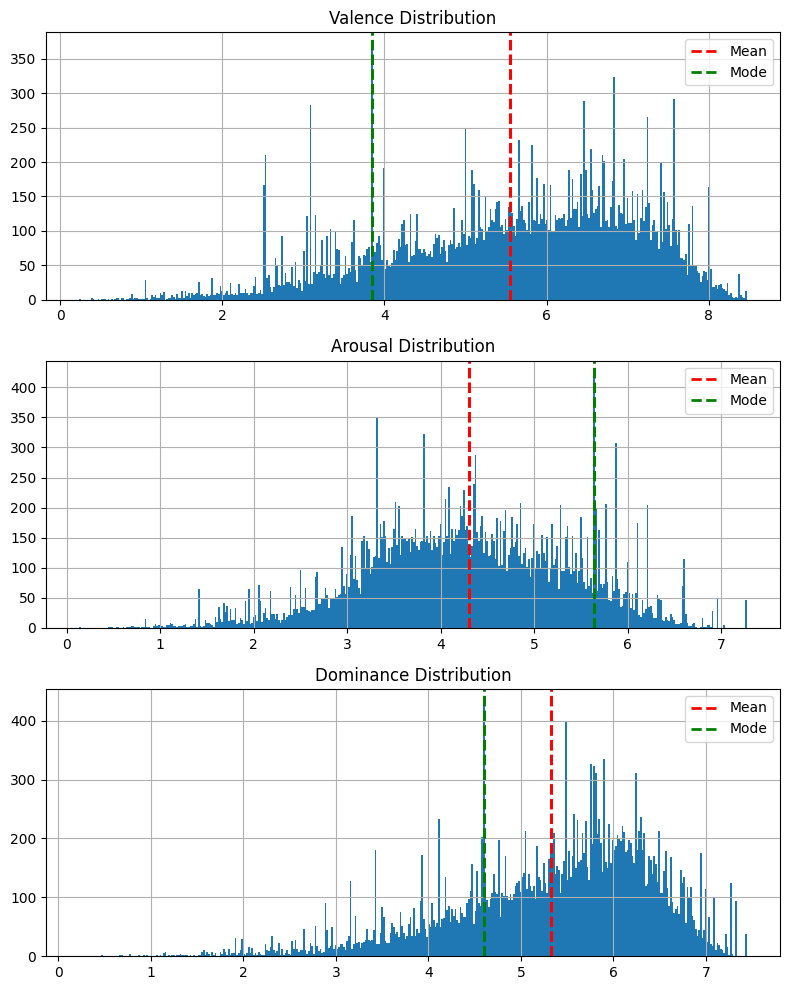

In [ ]:
# create a histogram for each column in DataFrame
fig, axis = plt.subplots(3, 1, figsize=(8,10))
df[['valence_tags', 'arousal_tags', 'dominance_tags']].hist(ax=axis, bins=400)

for ax in plt.gcf().axes:
    mean = df[ax.title.get_text()].mean()
    mode = df[ax.title.get_text()].mode()[0]
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    ax.axvline(mode, color='g', linestyle='dashed', linewidth=2)

# Titles for each histogram
titles = ['Valence Distribution', 'Arousal Distribution', 'Dominance Distribution']

# Set custom titles and add vertical lines for mean and mode
for ax, title in zip(axis, titles):
    mean = df[ax.title.get_text()].mean()
    mode = df[ax.title.get_text()].mode()[0]
    ax.set_title(title)  # Set the custom title
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(mode, color='g', linestyle='dashed', linewidth=2, label='Mode')
    ax.legend()  # Add a legend to show labels for mean and mode

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlapping

# display the plot
plt.show()

#From now on the text is clean

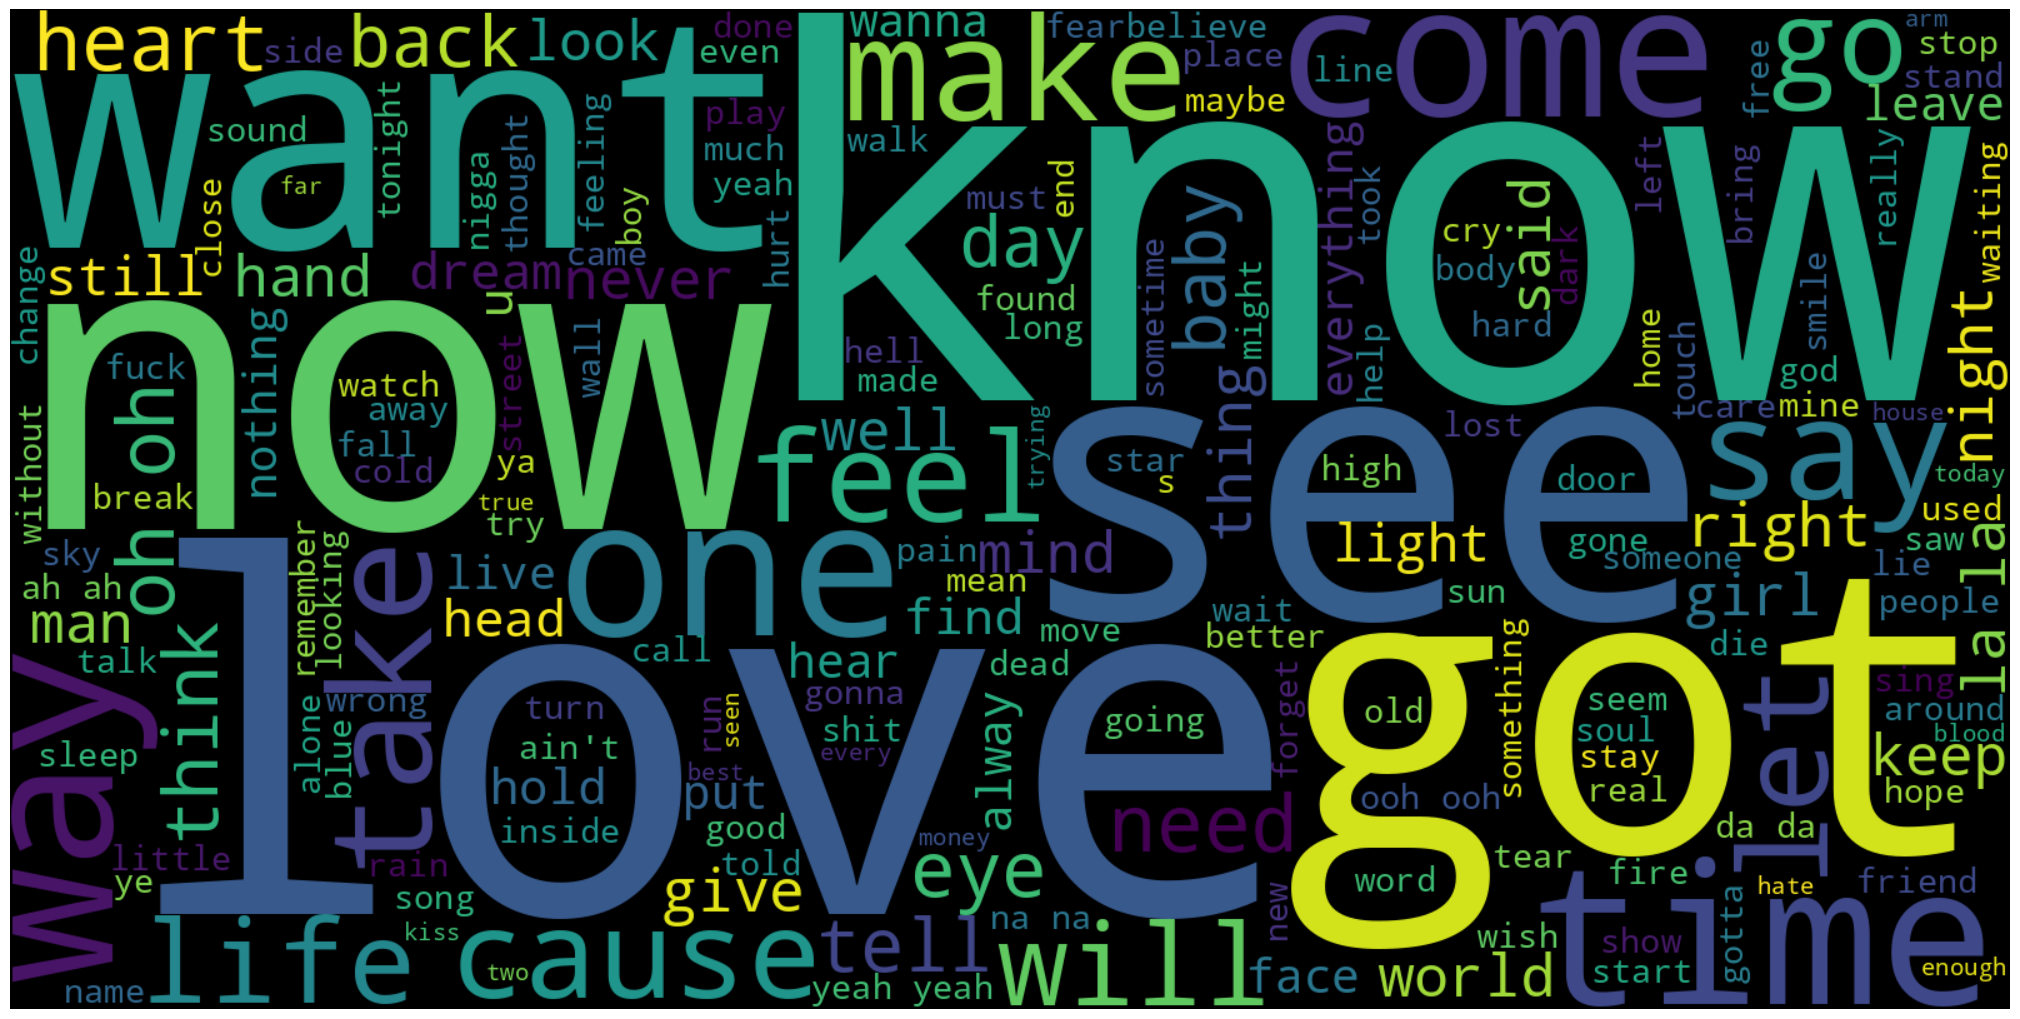

In [ ]:
import re
import nltk
import csv
from wordcloud import WordCloud

def clean_text(text):
    # Remove comments between square brackets
    text = re.sub(r'\[.*?\]', '', text)
    # Remove linebreak characters
    text = re.sub(r'\n', ' ', text)
    # Remove punctuation
    #text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Read the 'lyrics' column from the CSV file
full_lyrics = []
with open('/content/drive/MyDrive/Colab Notebooks/dataset.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        full_lyrics.append(row['lyrics'])

clean_lyrics = [clean_text(i) for i in full_lyrics]

# Generate a word cloud image with higher resolution
wordcloud = WordCloud(width=1600, height=800).generate(' '.join(clean_lyrics))

# Display the generated image with improved definition
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# you can see malformed words in wordcloud
# report exact proportion of 0 and 1 with numbers

#Clustering

In [ ]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

<ipython-input-1-ce188f0da866>:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#train_data = scaler.fit_transform(df_train)

In [ ]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


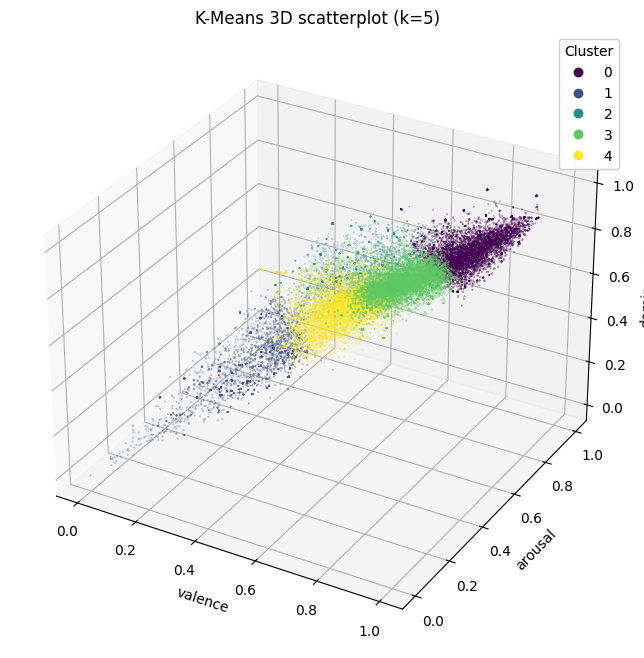

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['valence_tags', 'arousal_tags', 'dominance_tags']])

# Normalizza i dati per la visualizzazione
scaler = MinMaxScaler()
df[['valence_tags', 'arousal_tags', 'dominance_tags']] = scaler.fit_transform(df[['valence_tags', 'arousal_tags', 'dominance_tags']])

# Crea lo scatterplot tridimensionale
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['valence_tags'], df['arousal_tags'], df['dominance_tags'], c=df['cluster'], cmap='viridis', s=0.1)

ax.set_xlabel('valence')
ax.set_ylabel('arousal')
ax.set_zlabel('dominance', rotation=90)


ax.set_title('K-Means 3D scatterplot (k=5)')

# Aggiungi la legenda per i cluster

legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

plt.show()
